# **Projeto Piloto - Data Science Prática**

In [1]:
#Pacotes python que iremos utilizar:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as matplot
import time
import datetime
import statsmodels
import pylab as plot
import statistics
from fractions import Fraction as F
from sklearn.preprocessing import QuantileTransformer

In [2]:
pd.set_option('display.max_columns', False)

In [3]:
data = pd.read_csv('houses_to_rent_v2.csv')

In [4]:
data

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020


In [5]:
data.describe()

,area,rooms,bathroom,parking spaces,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
count,10692.000000,10692.000000,10692.000000,10692.000000,1.069200e+04,10692.000000,10692.000000,10692.000000,1.069200e+04
mean,149.217920,2.506079,2.236813,1.609147,1.174022e+03,3896.247194,366.704358,53.300879,5.490487e+03
std,537.016942,1.171266,1.407198,1.589521,1.559231e+04,3408.545518,3107.832321,47.768031,1.648473e+04
min,11.000000,1.000000,1.000000,0.000000,0.000000e+00,450.000000,0.000000,3.000000,4.990000e+02
25%,56.000000,2.000000,1.000000,0.000000,1.700000e+02,1530.000000,38.000000,21.000000,2.061750e+03
50%,90.000000,2.000000,2.000000,1.000000,5.600000e+02,2661.000000,125.000000,36.000000,3.581500e+03
75%,182.000000,3.000000,3.000000,2.000000,1.237500e+03,5000.000000,375.000000,68.000000,6.768000e+03
max,46335.000000,13.000000,10.000000,12.000000,1.117000e+06,45000.000000,313700.000000,677.000000,1.120000e+06


**Observação gráfica**

Text(0.5, 1.0, 'BOXPLOT - bathroom')

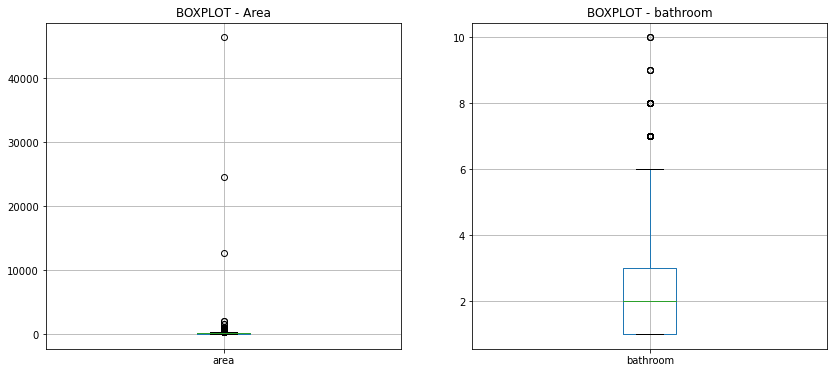

In [6]:
fig,axes = plt.subplots(1,2,figsize =(14,6))
data[['area']].boxplot(ax=axes[0])
axes[0].set_title("BOXPLOT - Area")
data[['bathroom']].boxplot(ax=axes[1])
axes[1].set_title("BOXPLOT - bathroom")

- Grande presença de outiliers na variável 'area' e baixa quantidade de outiliers na variável bathroom.

C:\Users\bruno\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'DISTPLOT - bathroom')

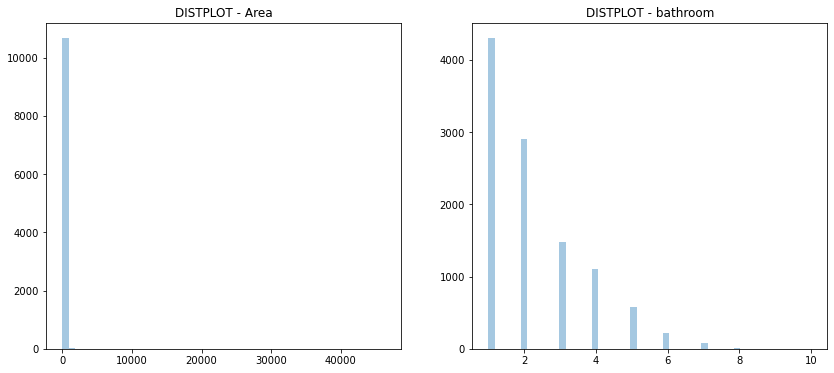

In [7]:
fig,axes = plt.subplots(1,2,figsize =(14,6))

area_histograma = data[['area']]
ax = sns.distplot(area_histograma,hist = True, kde= False,ax = axes[0])
axes[0].set_title("DISTPLOT - Area")


bathroom_histograma = data[['bathroom']]
ax = sns.distplot(bathroom_histograma,hist = True, kde= False,ax = axes[1])
axes[1].set_title("DISTPLOT - bathroom")

In [8]:
print("O desvio padrão da variável area é:", statistics.stdev(data['area']))
print("O desvio padrão da variável bathroom é:", statistics.stdev(data['bathroom']))
print("A media da variável area é:", statistics.mean(data['area']))
print("A media da variável bathroom é:", statistics.mean(data['bathroom']))
print("A variancia da variável bathroom é:", statistics.variance(data['bathroom']))
print("A variancia da variável area é:", statistics.variance(data['area']))
print("A variancia da variável area é:", statistics.variance(data['area']))

O desvio padrão da variável area é: 537.0169423364824
O desvio padrão da variável bathroom é: 1.4071981983604034
A media da variável area é: 149.21791994014217
A media da variável bathroom é: 2.2368125701459034
A variancia da variável bathroom é: 1.9802067694687655
A variancia da variável area é: 288387.19635642495
A variancia da variável area é: 288387.19635642495


**Conclusão**

- Através da análise do desvio padrão e dos gráficos podemos dizer que na variável "area" não temos uma boa uniformidade dos dados e uma grande quantidade de outiliers e na variável "bathroom", temos uma boa uniformidade de dados e uma baixa presença de outiliers.

**Min-Max**

In [9]:
data['bath_normal_min_max'] = data['bathroom'].apply(lambda x:((x-min(data['bathroom']))/(max(data['bathroom']) - min(data['bathroom']))))

In [10]:
data['area_normal_min_max'] = data['area'].apply(lambda x:((x-min(data['area']))/(max(data['area']) - min(data['area']))))

- Criação das duas variáveis normalizadas pelo conceito Min-Max

C:\Users\bruno\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\bruno\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\bruno\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdep

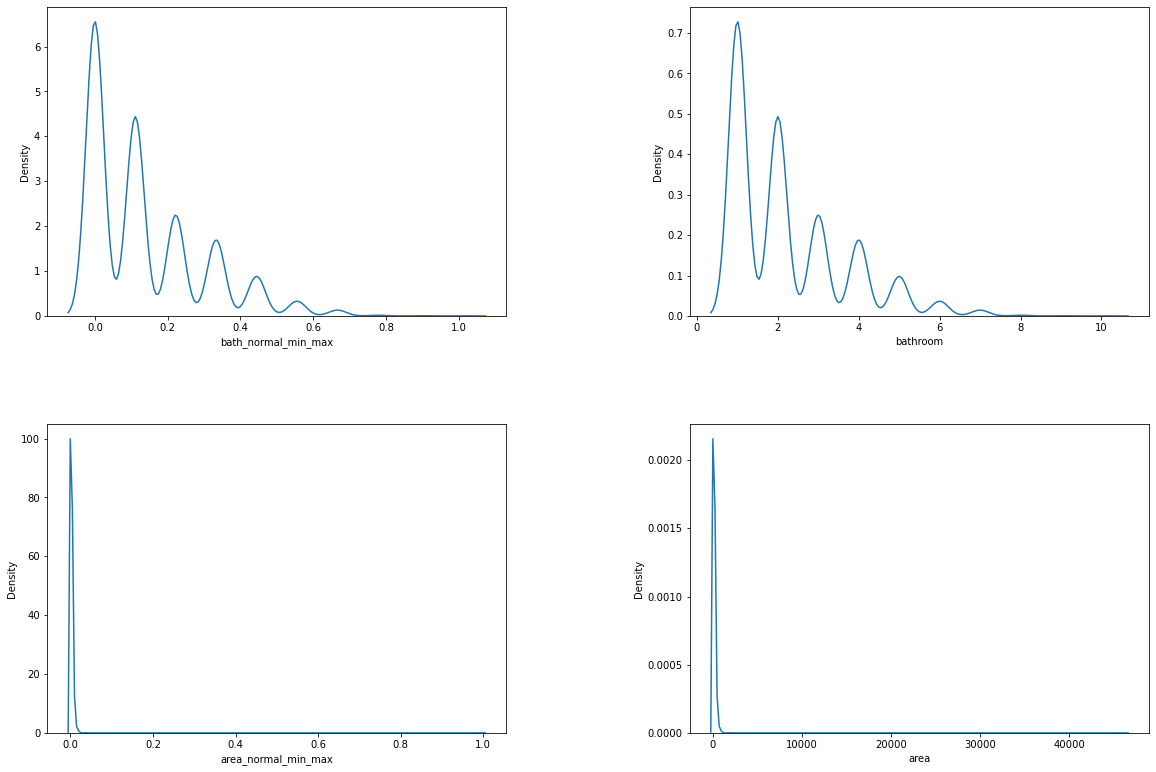

In [11]:
lista_numerica_valores = ['bath_normal_min_max','bathroom','area_normal_min_max','area']

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))
for col, ax in zip(lista_numerica_valores[0:], axs.ravel()):
    x=data.loc[:,col]
    sns.distplot(x, ax=ax, kde = True, hist = False)
    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.35,
                    wspace=0.4)

C:\Users\bruno\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\bruno\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\bruno\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\bruno\anaconda3\lib\si

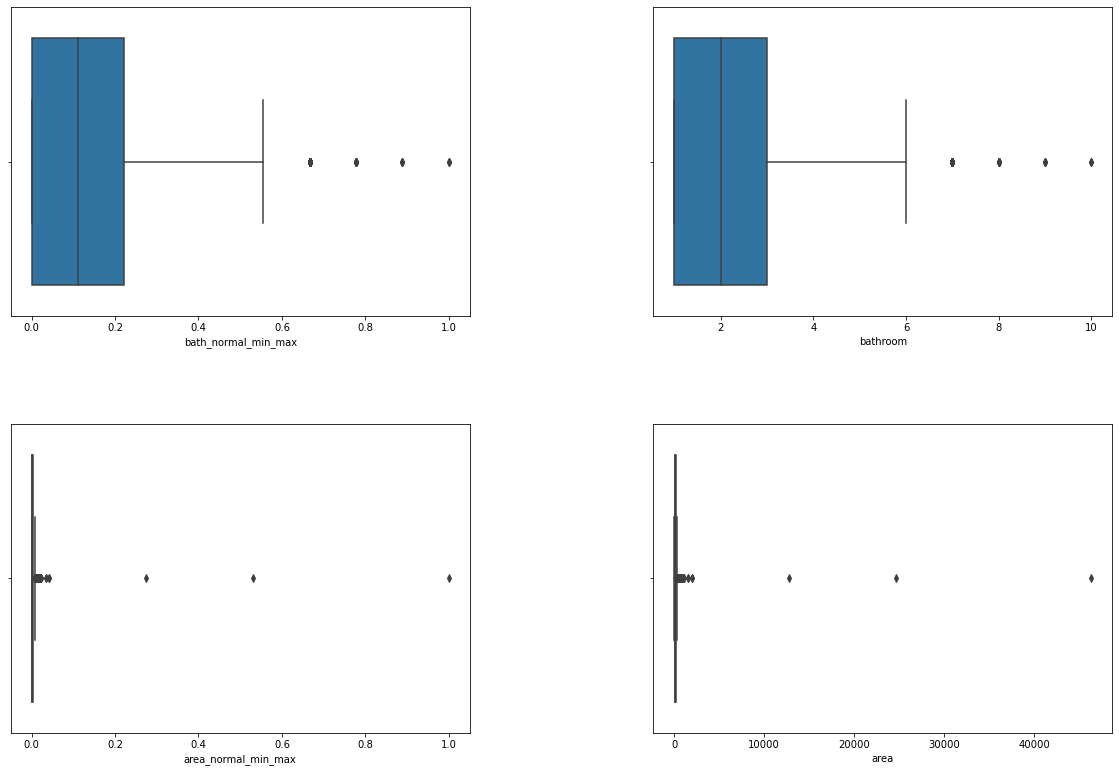

In [12]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))
for col, ax in zip(lista_numerica_valores[0:], axs.ravel()):
    x=data.loc[:,col]
    sns.boxplot(x, ax=ax)
    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.35,
                    wspace=0.4)

- Comparação entre as duas variáveis normalizadas e não normalizadas das duas variáveis.

In [13]:
print("O desvio padrão da variável area depois da normalização é:", statistics.stdev(data['area_normal_min_max']))
print("O desvio padrão da variável area antes da normalização é:", statistics.stdev(data['area']))
print("A media da variável area após a normalização é:", statistics.mean(data['area_normal_min_max']))
print("A media da variável area é:", statistics.mean(data['area']))

O desvio padrão da variável area depois da normalização é: 0.011592628925319112
O desvio padrão da variável area antes da normalização é: 537.0169423364824
A media da variável area após a normalização é: 0.002983721611694633
A media da variável area é: 149.21791994014217


In [14]:
print("O desvio padrão da variável bathroom depois da normalização é:", statistics.stdev(data['bath_normal_min_max']))
print("O desvio padrão da variável bathroom antes da normalização é:", statistics.stdev(data['bathroom']))
print("A media da variável bathroom após a normalização é:", statistics.mean(data['bath_normal_min_max']))
print("A media da variável bathroom é:", statistics.mean(data['bathroom']))

O desvio padrão da variável bathroom depois da normalização é: 0.15635535537337816
O desvio padrão da variável bathroom antes da normalização é: 1.4071981983604034
A media da variável bathroom após a normalização é: 0.13742361890510038
A media da variável bathroom é: 2.2368125701459034


**Standard**

In [15]:
data['area_normal_standard'] = (data['area'] - data['area'].mean())/data['area'].std(ddof = 0)

In [16]:
data['bath_normal_standard'] = (data['bathroom'] - data['bathroom'].mean())/data['bathroom'].std(ddof = 0)

In [17]:
data

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$),bath_normal_min_max,area_normal_min_max,area_normal_standard,bath_normal_standard
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618,0.000000,0.001274,-0.147522,-0.878960
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973,0.333333,0.006670,0.318035,1.253036
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841,0.000000,0.001490,-0.128899,-0.878960
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421,0.000000,0.000863,-0.182904,-0.878960
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836,0.000000,0.000302,-0.231322,-0.878960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926,0.000000,0.001123,-0.160557,-0.878960
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260,0.333333,0.005915,0.252857,1.253036
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390,0.222222,0.001274,-0.147522,0.542371
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020,0.111111,0.002353,-0.054410,-0.168294


C:\Users\bruno\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\bruno\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\bruno\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdep

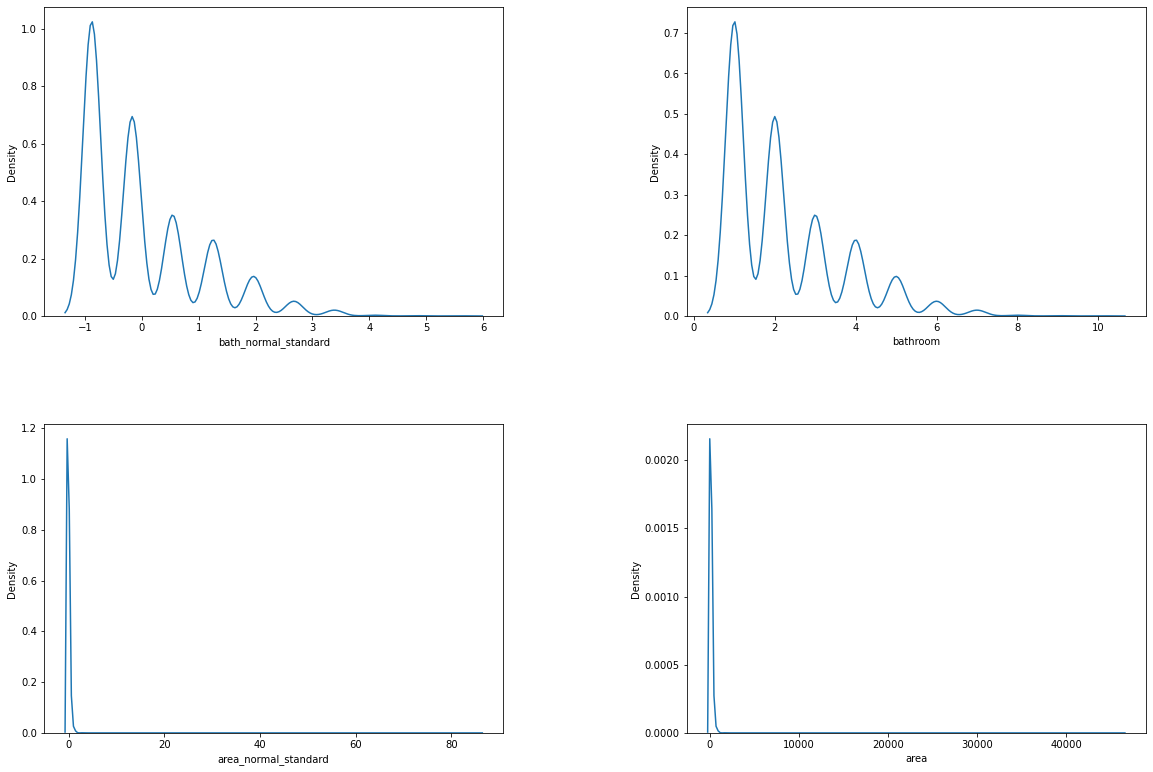

In [18]:
lista_numerica_valores_2 = ['bath_normal_standard','bathroom','area_normal_standard','area']

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))
for col, ax in zip(lista_numerica_valores_2[0:], axs.ravel()):
    x=data.loc[:,col]
    sns.distplot(x, ax=ax, kde = True, hist = False)
    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.35,
                    wspace=0.4)

C:\Users\bruno\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\bruno\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\bruno\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\bruno\anaconda3\lib\si

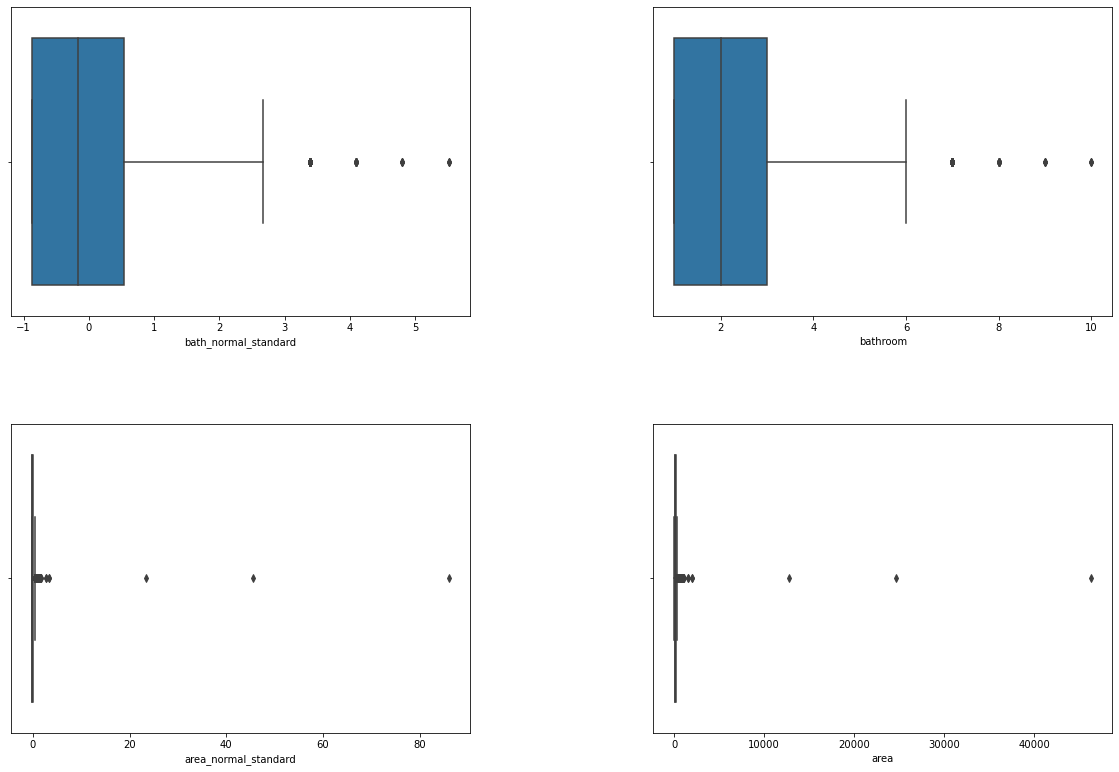

In [19]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))
for col, ax in zip(lista_numerica_valores_2[0:], axs.ravel()):
    x=data.loc[:,col]
    sns.boxplot(x, ax=ax)
    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.35,
                    wspace=0.4)

In [20]:
print("O desvio padrão da variável area depois da normalização é:", statistics.stdev(data['area_normal_standard']))
print("O desvio padrão da variável area antes da normalização é:", statistics.stdev(data['area']))
print("A media da variável bathroom após a normalização é:", statistics.mean(data['area_normal_standard']))
print("A media da variável bathroom é:", statistics.mean(data['area']))

O desvio padrão da variável area depois da normalização é: 1.0000467672161992
O desvio padrão da variável area antes da normalização é: 537.0169423364824
A media da variável bathroom após a normalização é: -6.718707166408629e-18
A media da variável bathroom é: 149.21791994014217


In [21]:
print("O desvio padrão da variável bath depois da normalização é:", statistics.stdev(data['bath_normal_standard']))
print("O desvio padrão da variável bath antes da normalização é:", statistics.stdev(data['bathroom']))
print("A media da variável bathroom após a normalização é:", statistics.mean(data['bath_normal_standard']))
print("A media da variável bathroom é:", statistics.mean(data['bathroom']))

O desvio padrão da variável bath depois da normalização é: 1.0000467672161923
O desvio padrão da variável bath antes da normalização é: 1.4071981983604034
A media da variável bathroom após a normalização é: 8.658950432425346e-17
A media da variável bathroom é: 2.2368125701459034


**Quantily Transform**

In [22]:
qt = QuantileTransformer(output_distribution='normal')

In [23]:
x = qt.fit_transform(data[data.columns[3:4]])

In [24]:
x

array([[-5.19933758],
       [ 1.10013967],
       [-5.19933758],
       ...,
       [ 0.65337661],
       [ 0.09549215],
       [-5.19933758]])

In [25]:
data['bath_normal_quantily'] = x

In [26]:
y = qt.fit_transform(data[data.columns[1:2]])

In [27]:
data['area_normal_quantily'] = y

C:\Users\bruno\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\bruno\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\bruno\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdep

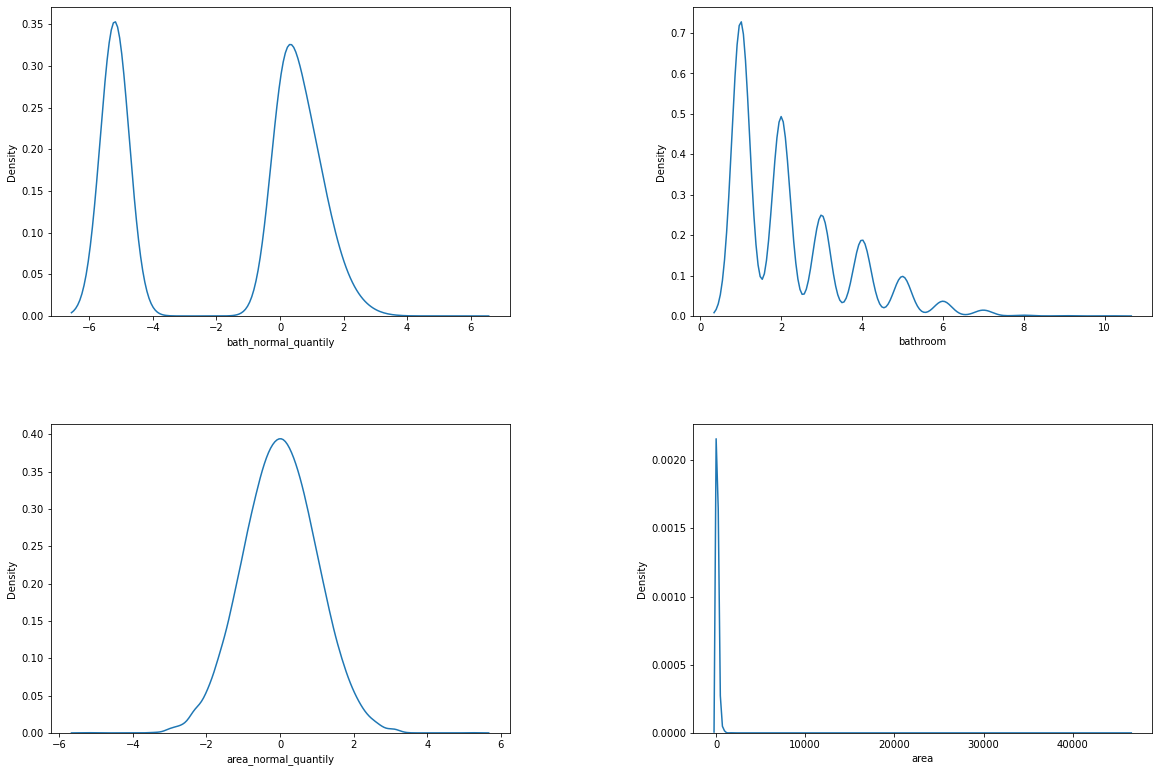

In [28]:
lista_numerica_valores_3 = ['bath_normal_quantily','bathroom','area_normal_quantily','area']

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))
for col, ax in zip(lista_numerica_valores_3[0:], axs.ravel()):
    x=data.loc[:,col]
    sns.distplot(x, ax=ax, kde = True, hist = False)
    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.35,
                    wspace=0.4)

C:\Users\bruno\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\bruno\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\bruno\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\bruno\anaconda3\lib\si

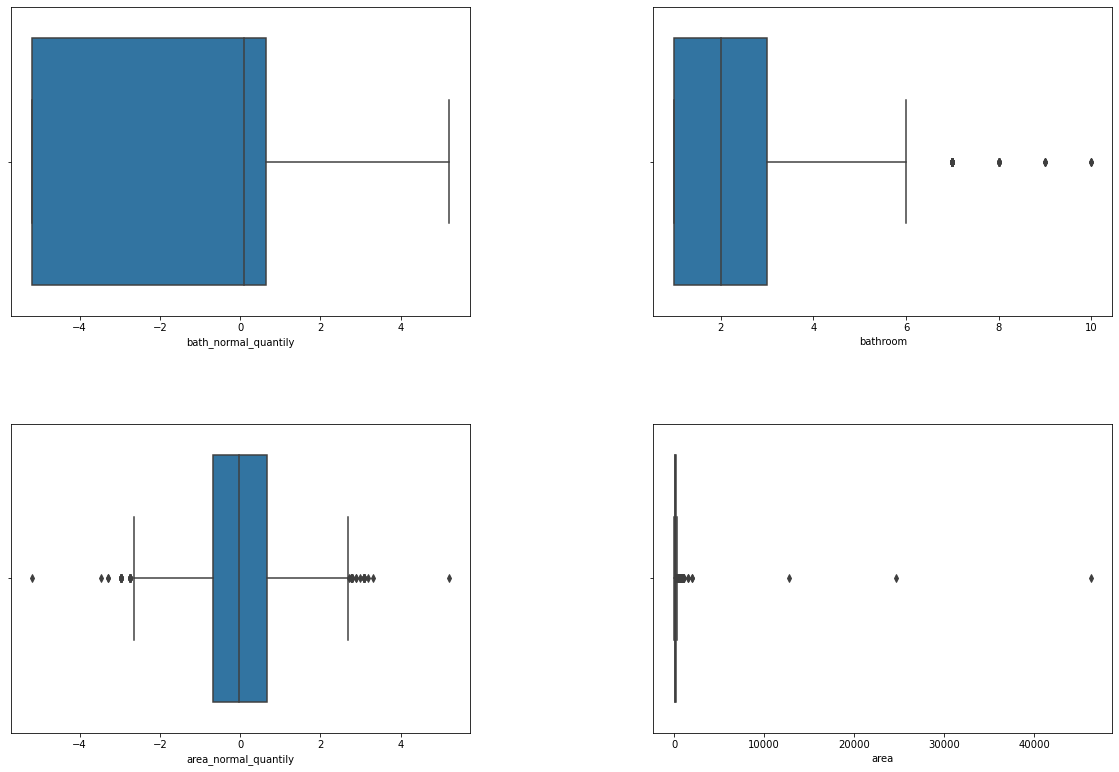

In [29]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(18, 12))
for col, ax in zip(lista_numerica_valores_3[0:], axs.ravel()):
    x=data.loc[:,col]
    sns.boxplot(x, ax=ax)
    plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.35,
                    wspace=0.4)

In [30]:
print("O desvio padrão da variável area depois da normalização é:", statistics.stdev(data['area_normal_quantily']))
print("O desvio padrão da variável area antes da normalização é:", statistics.stdev(data['area']))
print("A media da variável area após a normalização é:", statistics.mean(data['area_normal_quantily']))
print("A media da variável area é:", statistics.mean(data['area']))

O desvio padrão da variável area depois da normalização é: 1.0000395777273219
O desvio padrão da variável area antes da normalização é: 537.0169423364824
A media da variável area após a normalização é: 0.0002373018163919985
A media da variável area é: 149.21791994014217


In [31]:
print("O desvio padrão da variável bathroom depois da normalização é:", statistics.stdev(data['bath_normal_quantily']))
print("O desvio padrão da variável bathroom antes da normalização é:", statistics.stdev(data['bathroom']))
print("A media da variável bathroom após a normalização é:", statistics.mean(data['bath_normal_quantily']))
print("A media da variável bathroom é:", statistics.mean(data['bathroom']))

O desvio padrão da variável bathroom depois da normalização é: 2.9050980703600664
O desvio padrão da variável bathroom antes da normalização é: 1.4071981983604034
A media da variável bathroom após a normalização é: -1.707895629500924
A media da variável bathroom é: 2.2368125701459034


In [32]:
data

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$),bath_normal_min_max,area_normal_min_max,area_normal_standard,bath_normal_standard,bath_normal_quantily,area_normal_quantily
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618,0.000000,0.001274,-0.147522,-0.878960,-5.199338,-0.344154
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973,0.333333,0.006670,0.318035,1.253036,1.100140,1.337127
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841,0.000000,0.001490,-0.128899,-0.878960,-5.199338,-0.151121
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421,0.000000,0.000863,-0.182904,-0.878960,-5.199338,-0.798769
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836,0.000000,0.000302,-0.231322,-0.878960,-5.199338,-1.934489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926,0.000000,0.001123,-0.160557,-0.878960,-5.199338,-0.502074
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973,191,19260,0.333333,0.005915,0.252857,1.253036,1.100140,1.165596
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390,0.222222,0.001274,-0.147522,0.542371,0.653377,-0.344154
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279,155,14020,0.111111,0.002353,-0.054410,-0.168294,0.095492,0.275694


**Conclusão da normalização**

- Primeiramente devemos pensar se realmene as variáveis realmente precisavam ser normalizadas. A variável 'bathroom' tinha uniformidade e poucos outiliers no seu conjunto de dados então podemos dizer que normalizar seus dados não mudaria sua distribuição, já a variável 'area' continha uma grande quantidade de outiliers e valores muito longes da media, então normaliza-la seria interessante para nossa modelagem.

- Para a normalização Min-Max e Standard notamos que não houve uma mudança grafíca do valores antes e depois da normalização, eles permaneceram com a mesma quantidade de outiliers e não houve uma mudança da distribuição dos seus valores, mas a normalização não precisa ser somente para deixar as nossas variáveis normalizadas, elas podem ser utilziadas para manter um padrão de casas decimais no nosso dataset.

- Para a normalização QuantilyTransformer obtemos resultados interessantes nas duas variáveis. Todos os valores para a variável 'bathroom' ficaram entre os primeiro e terceiro quartil mostrando que não a dispersão de valores. Para a variável 'area' podemos observar uma dispersão de dados bem baixa tanto que podemos observar uma curva Gaussiana sendo formada nessa variável.